In [ ]:
import pandas as pd

df_lol = pd.read_csv("champions.csv")

# Prétraitement

In [ ]:
df_lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Champion Name       149 non-null    object 
 1   Role                149 non-null    object 
 2   Base Health         149 non-null    int64  
 3   Base Mana           149 non-null    int64  
 4   Base Armor          149 non-null    int64  
 5   Base Attack Damage  149 non-null    int64  
 6   Gold Efficiency     149 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 8.3+ KB


In [ ]:
df_lol.duplicated().sum()

0

In [ ]:
df_lol.isna().sum()

Champion Name         0
Role                  0
Base Health           0
Base Mana             0
Base Armor            0
Base Attack Damage    0
Gold Efficiency       0
dtype: int64

In [ ]:
df_lol.describe()

,Base Health,Base Mana,Base Armor,Base Attack Damage,Gold Efficiency
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,557.241611,313.315436,29.939597,59.476510,1.042282
std,36.953340,123.571792,6.801459,5.845516,0.020438
min,340.000000,0.000000,17.000000,45.000000,1.000000
25%,532.000000,280.000000,24.000000,55.000000,1.020000
50%,562.000000,325.000000,30.000000,60.000000,1.040000
75%,585.000000,375.000000,35.000000,64.000000,1.060000
max,625.000000,800.000000,47.000000,72.000000,1.100000


In [ ]:
df_lol.columns

Index(['Champion Name', 'Role', 'Base Health', 'Base Mana', 'Base Armor',
       'Base Attack Damage', 'Gold Efficiency'],
      dtype='object')

In [ ]:
df_lol.value_counts()

Champion Name  Role     Base Health  Base Mana  Base Armor  Base Attack Damage  Gold Efficiency
Aatrox         Top      580          0          38          60                  1.05               1
Riven          Top      560          100        33          64                  1.05               1
Samira         ADC      530          348        26          57                  1.03               1
Sejuani        Jungle   560          400        34          66                  1.06               1
Senna          Support  520          350        28          50                  1.02               1
                                                                                                  ..
Karthus        Jungle   528          467        21          45                  1.00               1
Kassadin       Mid      576          400        19          59                  1.02               1
Katarina       Mid      602          0          27          58                  1.04            

# Création d'un DF par rôle !

In [ ]:
df_lol["Role"].value_counts()

Role
Mid        39
Top        37
Jungle     32
Support    22
ADC        19
Name: count, dtype: int64

In [ ]:
df_lol_top = df_lol[df_lol["Role"] == "Top"]

In [ ]:
df_lol_jungle = df_lol[df_lol["Role"] == "Jungle"]

In [ ]:
df_lol_mid = df_lol[df_lol["Role"] == "Mid"]

In [ ]:
df_lol_adc = df_lol[df_lol["Role"] == "ADC"]

In [ ]:
df_lol_support = df_lol[df_lol["Role"] == "Support"]

# DF TOPLANE

**MAX**

In [ ]:
df_best_top = df_lol_top[(df_lol_top["Base Health"] == df_lol_top["Base Health"].max())|(df_lol_top["Base Mana"] == df_lol_top["Base Mana"].max())|(df_lol_top["Base Armor"] == df_lol_top["Base Armor"].max())|(df_lol_top["Base Attack Damage"] == df_lol_top["Base Attack Damage"].max())]
df_best_top.to_csv("best_top.csv")
df_best_top

In [ ]:
df_lol_top_health_max = df_lol_top[df_lol_top["Base Health"] == df_lol_top["Base Health"].max()]

In [ ]:
df_lol_top_mana_max = df_lol_top[df_lol_top["Base Mana"] == df_lol_top["Base Mana"].max()]

In [ ]:
df_lol_top_armor_max = df_lol_top[df_lol_top["Base Armor"] == df_lol_top["Base Armor"].max()]

In [ ]:
df_lol_top_atk_max = df_lol_top[df_lol_top["Base Attack Damage"] == df_lol_top["Base Attack Damage"].max()]

In [ ]:
df_lol_top_gold_max = df_lol_top[df_lol_top["Gold Efficiency"] == df_lol_top["Gold Efficiency"].max()]

In [ ]:
df_best_top_max = pd.concat([df_lol_top_health_max, df_lol_top_mana_max, df_lol_top_armor_max, df_lol_top_atk_max, df_lol_top_gold_max])

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_top_max["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats max de la TopLane")
plt.show()

**MIN**

In [ ]:
df_lol_top[(df_lol_top["Base Health"] == df_lol_top["Base Health"].min())| (df_lol_top["Base Mana"] == df_lol_top["Base Mana"].min())| (df_lol_top["Base Armor"] == df_lol_top["Base Armor"].min())| (df_lol_top["Base Attack Damage"] == df_lol_top["Base Attack Damage"].min())]

In [ ]:
df_lol_top_health_min = df_lol_top[df_lol_top["Base Health"] == df_lol_top["Base Health"].min()]

In [ ]:
df_lol_top_mana_min = df_lol_top[df_lol_top["Base Mana"] == df_lol_top["Base Mana"].min()]

In [ ]:
df_lol_top_armor_min = df_lol_top[df_lol_top["Base Armor"] == df_lol_top["Base Armor"].min()]

In [ ]:
df_lol_top_atk_min = df_lol_top[df_lol_top["Base Attack Damage"] == df_lol_top["Base Attack Damage"].min()]

In [ ]:
df_lol_top_gold_min = df_lol_top[df_lol_top["Gold Efficiency"] == df_lol_top["Gold Efficiency"].min()]

In [ ]:
df_best_top_min = pd.concat([df_lol_top_health_min, df_lol_top_mana_min, df_lol_top_armor_min, df_lol_top_atk_min, df_lol_top_gold_min])
df_best_top_min.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_top_min["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats min de la TopLane")
plt.show()

# DF JUNGLE

**MAX**

In [ ]:
df_best_jungle = df_lol_jungle[(df_lol_jungle["Base Health"] == df_lol_jungle["Base Health"].max())|(df_lol_jungle["Base Mana"] == df_lol_jungle["Base Mana"].max())|(df_lol_jungle["Base Armor"] == df_lol_jungle["Base Armor"].max())|(df_lol_jungle["Base Attack Damage"] == df_lol_jungle["Base Attack Damage"].max())]
df_best_jungle.to_csv("best_jungle.csv")
df_best_jungle

In [ ]:
df_lol_jungle_health_max = df_lol_jungle[df_lol_jungle["Base Health"] == df_lol_jungle["Base Health"].max()]

In [ ]:
df_lol_jungle_mana_max = df_lol_jungle[df_lol_jungle["Base Mana"] == df_lol_jungle["Base Mana"].max()]

In [ ]:
df_lol_jungle_armor_max = df_lol_jungle[df_lol_jungle["Base Armor"] == df_lol_jungle["Base Armor"].max()]

In [ ]:
df_lol_jungle_atk_max = df_lol_jungle[df_lol_jungle["Base Attack Damage"] == df_lol_jungle["Base Attack Damage"].max()]

In [ ]:
df_lol_jungle_gold_max = df_lol_jungle[df_lol_jungle["Gold Efficiency"] == df_lol_jungle["Gold Efficiency"].max()]

In [ ]:
df_best_jungle_max = pd.concat([df_lol_jungle_health_max, df_lol_jungle_mana_max, df_lol_jungle_armor_max, df_lol_jungle_atk_max, df_lol_jungle_gold_max])
df_best_jungle_max.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_jungle_max["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats max de la Jungle")
plt.show()

**MIN**

In [ ]:
df_lol_jungle[(df_lol_jungle["Base Health"] == df_lol_jungle["Base Health"].min())| (df_lol_jungle["Base Mana"] == df_lol_jungle["Base Mana"].min())| (df_lol_jungle["Base Armor"] == df_lol_jungle["Base Armor"].min())| (df_lol_jungle["Base Attack Damage"] == df_lol_jungle["Base Attack Damage"].min())]

In [ ]:
df_lol_jungle_health_min = df_lol_jungle[df_lol_jungle["Base Health"] == df_lol_jungle["Base Health"].min()]

In [ ]:
df_lol_jungle_mana_min = df_lol_jungle[df_lol_jungle["Base Mana"] == df_lol_jungle["Base Mana"].min()]

In [ ]:
df_lol_jungle_armor_min = df_lol_jungle[df_lol_jungle["Base Armor"] == df_lol_jungle["Base Armor"].min()]

In [ ]:
df_lol_jungle_atk_min = df_lol_jungle[df_lol_jungle["Base Attack Damage"] == df_lol_jungle["Base Attack Damage"].min()]

In [ ]:
df_lol_jungle_gold_min = df_lol_jungle[df_lol_jungle["Gold Efficiency"] == df_lol_jungle["Gold Efficiency"].min()]

In [ ]:
df_best_jungle_min = pd.concat([df_lol_jungle_health_min, df_lol_jungle_mana_min, df_lol_jungle_armor_min, df_lol_jungle_atk_min, df_lol_jungle_gold_min])
df_best_jungle_min.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_jungle_min["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats min de la Jungle")
plt.show()

# DF MIDLANE




**MAX**

In [ ]:
df_best_mid = df_lol_mid[(df_lol_mid["Base Health"] == df_lol_mid["Base Health"].max())| (df_lol_mid["Base Mana"] == df_lol_mid["Base Mana"].max())| (df_lol_mid["Base Armor"] == df_lol_mid["Base Armor"].max())| (df_lol_mid["Base Attack Damage"] == df_lol_mid["Base Attack Damage"].max())]
df_best_mid.to_csv("best_mid.csv")
df_best_mid

In [ ]:
df_lol_mid_health_max = df_lol_mid[df_lol_mid["Base Health"] == df_lol_mid["Base Health"].max()]

In [ ]:
df_lol_mid_mana_max = df_lol_mid[df_lol_mid["Base Mana"] == df_lol_mid["Base Mana"].max()]

In [ ]:
df_lol_mid_armor_max = df_lol_mid[df_lol_mid["Base Armor"] == df_lol_mid["Base Armor"].max()]

In [ ]:
df_lol_mid_atk_max = df_lol_mid[df_lol_mid["Base Attack Damage"] == df_lol_mid["Base Attack Damage"].max()]

In [ ]:
df_lol_mid_gold_max = df_lol_mid[df_lol_mid["Gold Efficiency"] == df_lol_mid["Gold Efficiency"].max()]

In [ ]:
df_best_mid_max = pd.concat([df_lol_mid_health_max, df_lol_mid_mana_max, df_lol_mid_armor_max, df_lol_mid_atk_max, df_lol_mid_gold_max])
df_best_mid_max.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_mid_max["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats max de la MidLane")
plt.show()

**MIN**

In [ ]:
df_lol_mid[(df_lol_mid["Base Health"] == df_lol_mid["Base Health"].min())|(df_lol_mid["Base Mana"] == df_lol_mid["Base Mana"].min())|(df_lol_mid["Base Armor"] == df_lol_mid["Base Armor"].min())|(df_lol_mid["Base Attack Damage"] == df_lol_mid["Base Attack Damage"].min())]

In [ ]:
df_lol_mid_health_min = df_lol_mid[df_lol_mid["Base Health"] == df_lol_mid["Base Health"].min()]

In [ ]:
df_lol_mid_mana_min = df_lol_mid[df_lol_mid["Base Mana"] == df_lol_mid["Base Mana"].min()]

In [ ]:
df_lol_mid_armor_min = df_lol_mid[df_lol_mid["Base Armor"] == df_lol_mid["Base Armor"].min()]

In [ ]:
df_lol_mid_atk_min = df_lol_mid[df_lol_mid["Base Attack Damage"] == df_lol_mid["Base Attack Damage"].min()]

In [ ]:
df_lol_mid_gold_min = df_lol_mid[df_lol_mid["Gold Efficiency"] == df_lol_mid["Gold Efficiency"].min()]

In [ ]:
df_best_mid_min = pd.concat([df_lol_mid_health_min, df_lol_mid_mana_min, df_lol_mid_armor_min, df_lol_mid_atk_min, df_lol_mid_gold_min])
df_best_mid_min["Champion Name"].value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_mid_min["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats min de la MidLane")
plt.show()

# DF ADC

**MAX**

In [ ]:
df_best_adc = df_lol_adc[(df_lol_adc["Base Health"] == df_lol_adc["Base Health"].max())|(df_lol_adc["Base Mana"] == df_lol_adc["Base Mana"].max())|(df_lol_adc["Base Armor"] == df_lol_adc["Base Armor"].max())| (df_lol_adc["Base Attack Damage"] == df_lol_adc["Base Attack Damage"].max())]
df_best_adc.to_csv("best_adc.csv")
df_best_adc

In [ ]:
df_lol_adc_health_max = df_lol_adc[df_lol_adc["Base Health"] == df_lol_adc["Base Health"].max()]

In [ ]:
df_lol_adc_mana_max = df_lol_adc[df_lol_adc["Base Mana"] == df_lol_adc["Base Mana"].max()]

In [ ]:
df_lol_adc_armor_max = df_lol_adc[df_lol_adc["Base Armor"] == df_lol_adc["Base Armor"].max()]

In [ ]:
df_lol_adc_atk_max = df_lol_adc[df_lol_adc["Base Attack Damage"] == df_lol_adc["Base Attack Damage"].max()]

In [ ]:
df_lol_adc_gold_max = df_lol_adc[df_lol_adc["Gold Efficiency"] == df_lol_adc["Gold Efficiency"].max()]

In [ ]:
df_best_adc_max = pd.concat([df_lol_adc_health_max, df_lol_adc_mana_max, df_lol_adc_armor_max, df_lol_adc_atk_max, df_lol_adc_gold_max])
df_best_adc_max.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_adc_max["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats max ADC")
plt.show()

**MIN**

In [ ]:
df_lol_adc[(df_lol_adc["Base Health"] == df_lol_adc["Base Health"].min())|(df_lol_adc["Base Mana"] == df_lol_adc["Base Mana"].min())|(df_lol_adc["Base Armor"] == df_lol_adc["Base Armor"].min())| (df_lol_adc["Base Attack Damage"] == df_lol_adc["Base Attack Damage"].min())]

In [ ]:
df_lol_adc_health_min = df_lol_adc[df_lol_adc["Base Health"] == df_lol_adc["Base Health"].min()]

In [ ]:
df_lol_adc_mana_min = df_lol_adc[df_lol_adc["Base Mana"] == df_lol_adc["Base Mana"].min()]

In [ ]:
df_lol_adc_armor_min = df_lol_adc[df_lol_adc["Base Armor"] == df_lol_adc["Base Armor"].min()]

In [ ]:
df_lol_adc_atk_min = df_lol_adc[df_lol_adc["Base Attack Damage"] == df_lol_adc["Base Attack Damage"].min()]

In [ ]:
df_lol_adc_gold_min = df_lol_adc[df_lol_adc["Gold Efficiency"] == df_lol_adc["Gold Efficiency"].min()]

In [ ]:
df_best_adc_min = pd.concat([df_lol_adc_health_min, df_lol_adc_mana_min, df_lol_adc_armor_min, df_lol_adc_atk_min, df_lol_adc_gold_min])
df_best_adc_min.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_adc_min["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats min ADC")
plt.show()

# DF Support

**MAX**

In [ ]:
df_best_support = df_lol_support[(df_lol_support["Base Health"] == df_lol_support["Base Health"].max())| (df_lol_support["Base Mana"] == df_lol_support["Base Mana"].max())| (df_lol_support["Base Armor"] == df_lol_support["Base Armor"].max())| (df_lol_support["Base Attack Damage"] == df_lol_support["Base Attack Damage"].max())]
df_best_support.to_csv("best_support.csv")
df_best_support

In [ ]:
df_lol_support_health_max = df_lol_support[df_lol_support["Base Health"] == df_lol_support["Base Health"].max()]

In [ ]:
df_lol_support_mana_max = df_lol_support[df_lol_support["Base Mana"] == df_lol_support["Base Mana"].max()]

In [ ]:
df_lol_support_armor_max = df_lol_support[df_lol_support["Base Armor"] == df_lol_support["Base Armor"].max()]

In [ ]:
df_lol_support_atk_max = df_lol_support[df_lol_support["Base Attack Damage"] == df_lol_support["Base Attack Damage"].max()]

In [ ]:
df_lol_support_gold_max = df_lol_support[df_lol_support["Gold Efficiency"] == df_lol_support["Gold Efficiency"].max()]

In [ ]:
df_best_support_max = pd.concat([df_lol_support_health_max, df_lol_support_mana_max, df_lol_support_armor_max, df_lol_support_atk_max, df_lol_support_gold_max])
df_best_support_max.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_support_max["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats max Support")
plt.show()

**MIN**

In [ ]:
df_lol_support[(df_lol_support["Base Armor"] == df_lol_support["Base Armor"].min())| (df_lol_support["Base Attack Damage"] == df_lol_support["Base Attack Damage"].min())| (df_lol_support["Base Health"] == df_lol_support["Base Health"].min())| (df_lol_support["Base Mana"] == df_lol_support["Base Mana"].min())]

In [ ]:
df_lol_support_health_min = df_lol_support[df_lol_support["Base Health"] == df_lol_support["Base Health"].min()]

In [ ]:
df_lol_support_mana_min = df_lol_support[df_lol_support["Base Mana"] == df_lol_support["Base Mana"].min()]

In [ ]:
df_lol_support_armor_min = df_lol_support[df_lol_support["Base Armor"] == df_lol_support["Base Armor"].min()]

In [ ]:
df_lol_support_atk_min = df_lol_support[df_lol_support["Base Attack Damage"] == df_lol_support["Base Attack Damage"].min()]

In [ ]:
df_lol_support_gold_min = df_lol_support[df_lol_support["Gold Efficiency"] == df_lol_support["Gold Efficiency"].min()]

In [ ]:
df_best_support_min = pd.concat([df_lol_support_health_min, df_lol_support_mana_min, df_lol_support_armor_min, df_lol_support_atk_min, df_lol_support_gold_min])
df_best_support_min.value_counts()

In [ ]:
# Calculer la fréquence d'apparition des champions
champion_counts = df_best_support_min["Champion Name"].value_counts().reset_index()
champion_counts.columns = ["Champion Name", "Count"]

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(x="Champion Name", y="Count", data=champion_counts)
plt.xticks(rotation=45)
plt.xlabel("Champion Name")
plt.ylabel("Count")
plt.title("Champion plus présent dans les stats min Support")
plt.show()

# DATAVIZ

# TOP LANE

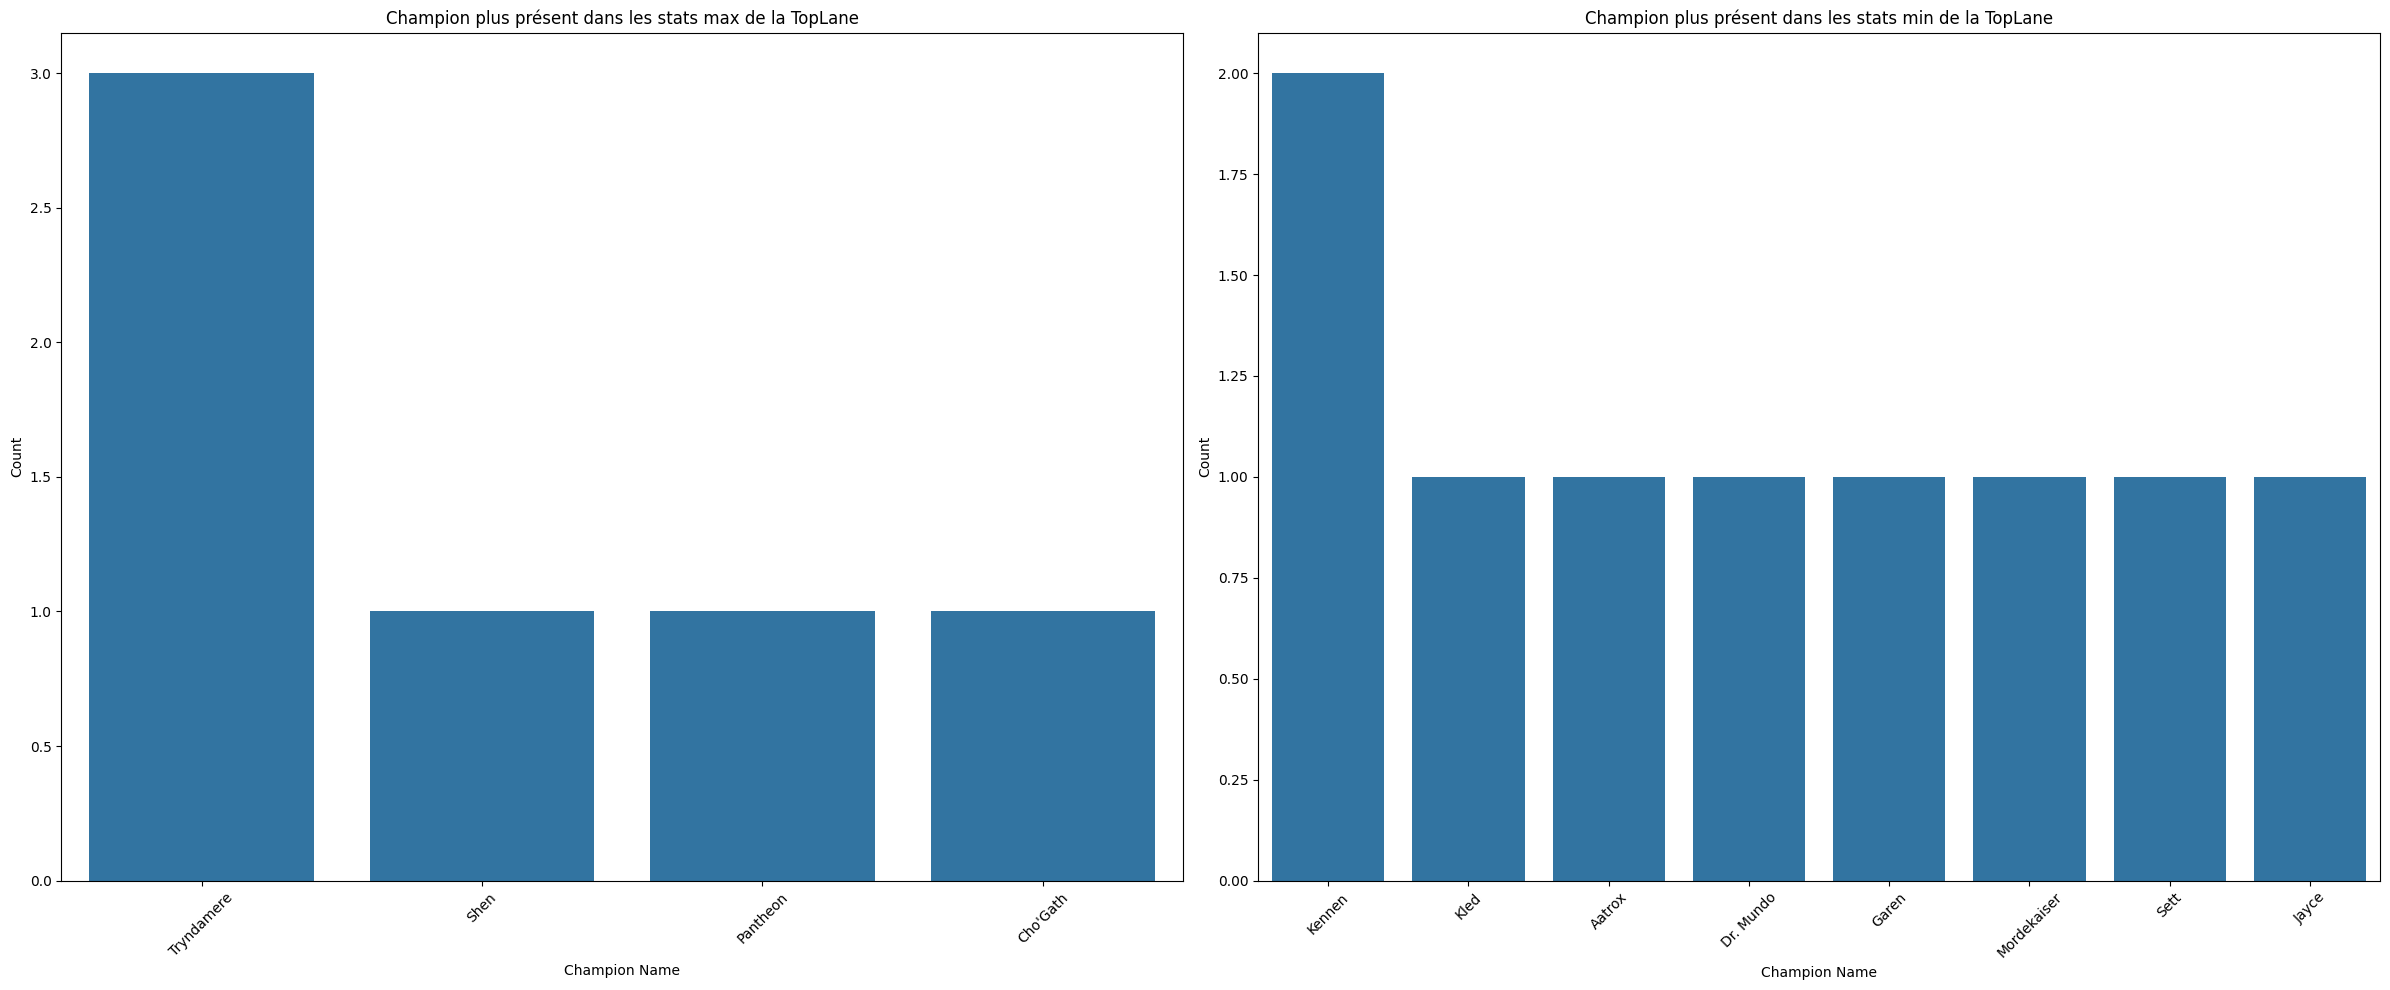

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la fréquence d'apparition des champions dans les stats max
champion_counts_max = df_best_top_max["Champion Name"].value_counts().reset_index()
champion_counts_max.columns = ["Champion Name", "Count"]

# Calculer la fréquence d'apparition des champions dans les stats min
champion_counts_min = df_best_top_min["Champion Name"].value_counts().reset_index()
champion_counts_min.columns = ["Champion Name", "Count"]

# Créer les graphiques à barres côte à côte
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Graphique des stats max
sns.barplot(x="Champion Name", y="Count", data=champion_counts_max, ax=axes[0])
axes[0].set_title("Champion plus présent dans les stats max de la TopLane")
axes[0].set_xlabel("Champion Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Graphique des stats min
sns.barplot(x="Champion Name", y="Count", data=champion_counts_min, ax=axes[1])
axes[1].set_title("Champion plus présent dans les stats min de la TopLane")
axes[1].set_xlabel("Champion Name")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# JUNGLE

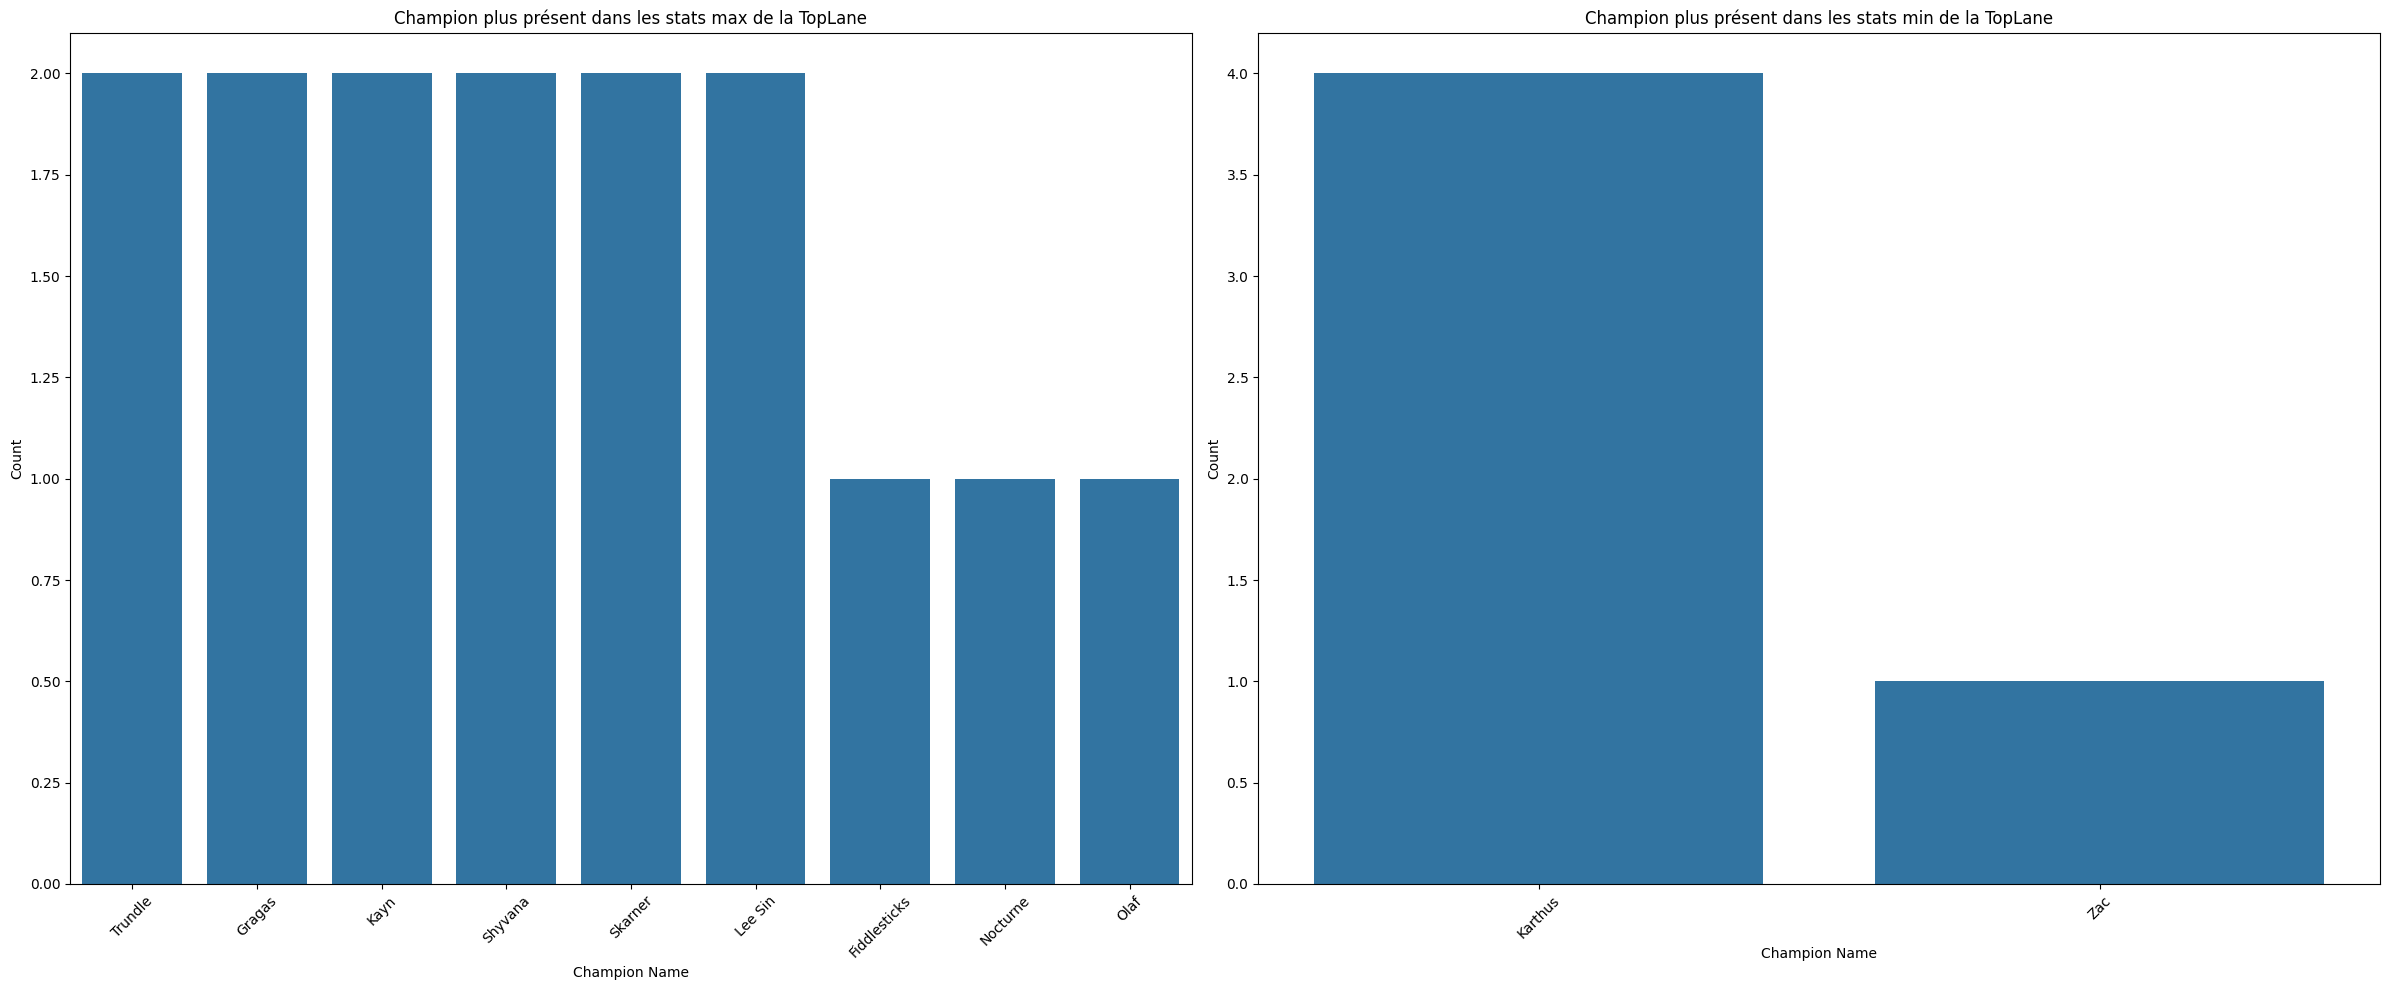

In [ ]:

# Calculer la fréquence d'apparition des champions dans les stats max
champion_counts_max = df_best_jungle_max["Champion Name"].value_counts().reset_index()
champion_counts_max.columns = ["Champion Name", "Count"]

# Calculer la fréquence d'apparition des champions dans les stats min
champion_counts_min = df_best_jungle_min["Champion Name"].value_counts().reset_index()
champion_counts_min.columns = ["Champion Name", "Count"]

# Créer les graphiques à barres côte à côte
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Graphique des stats max
sns.barplot(x="Champion Name", y="Count", data=champion_counts_max, ax=axes[0])
axes[0].set_title("Champion plus présent dans les stats max de la TopLane")
axes[0].set_xlabel("Champion Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Graphique des stats min
sns.barplot(x="Champion Name", y="Count", data=champion_counts_min, ax=axes[1])
axes[1].set_title("Champion plus présent dans les stats min de la TopLane")
axes[1].set_xlabel("Champion Name")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# MID LANE


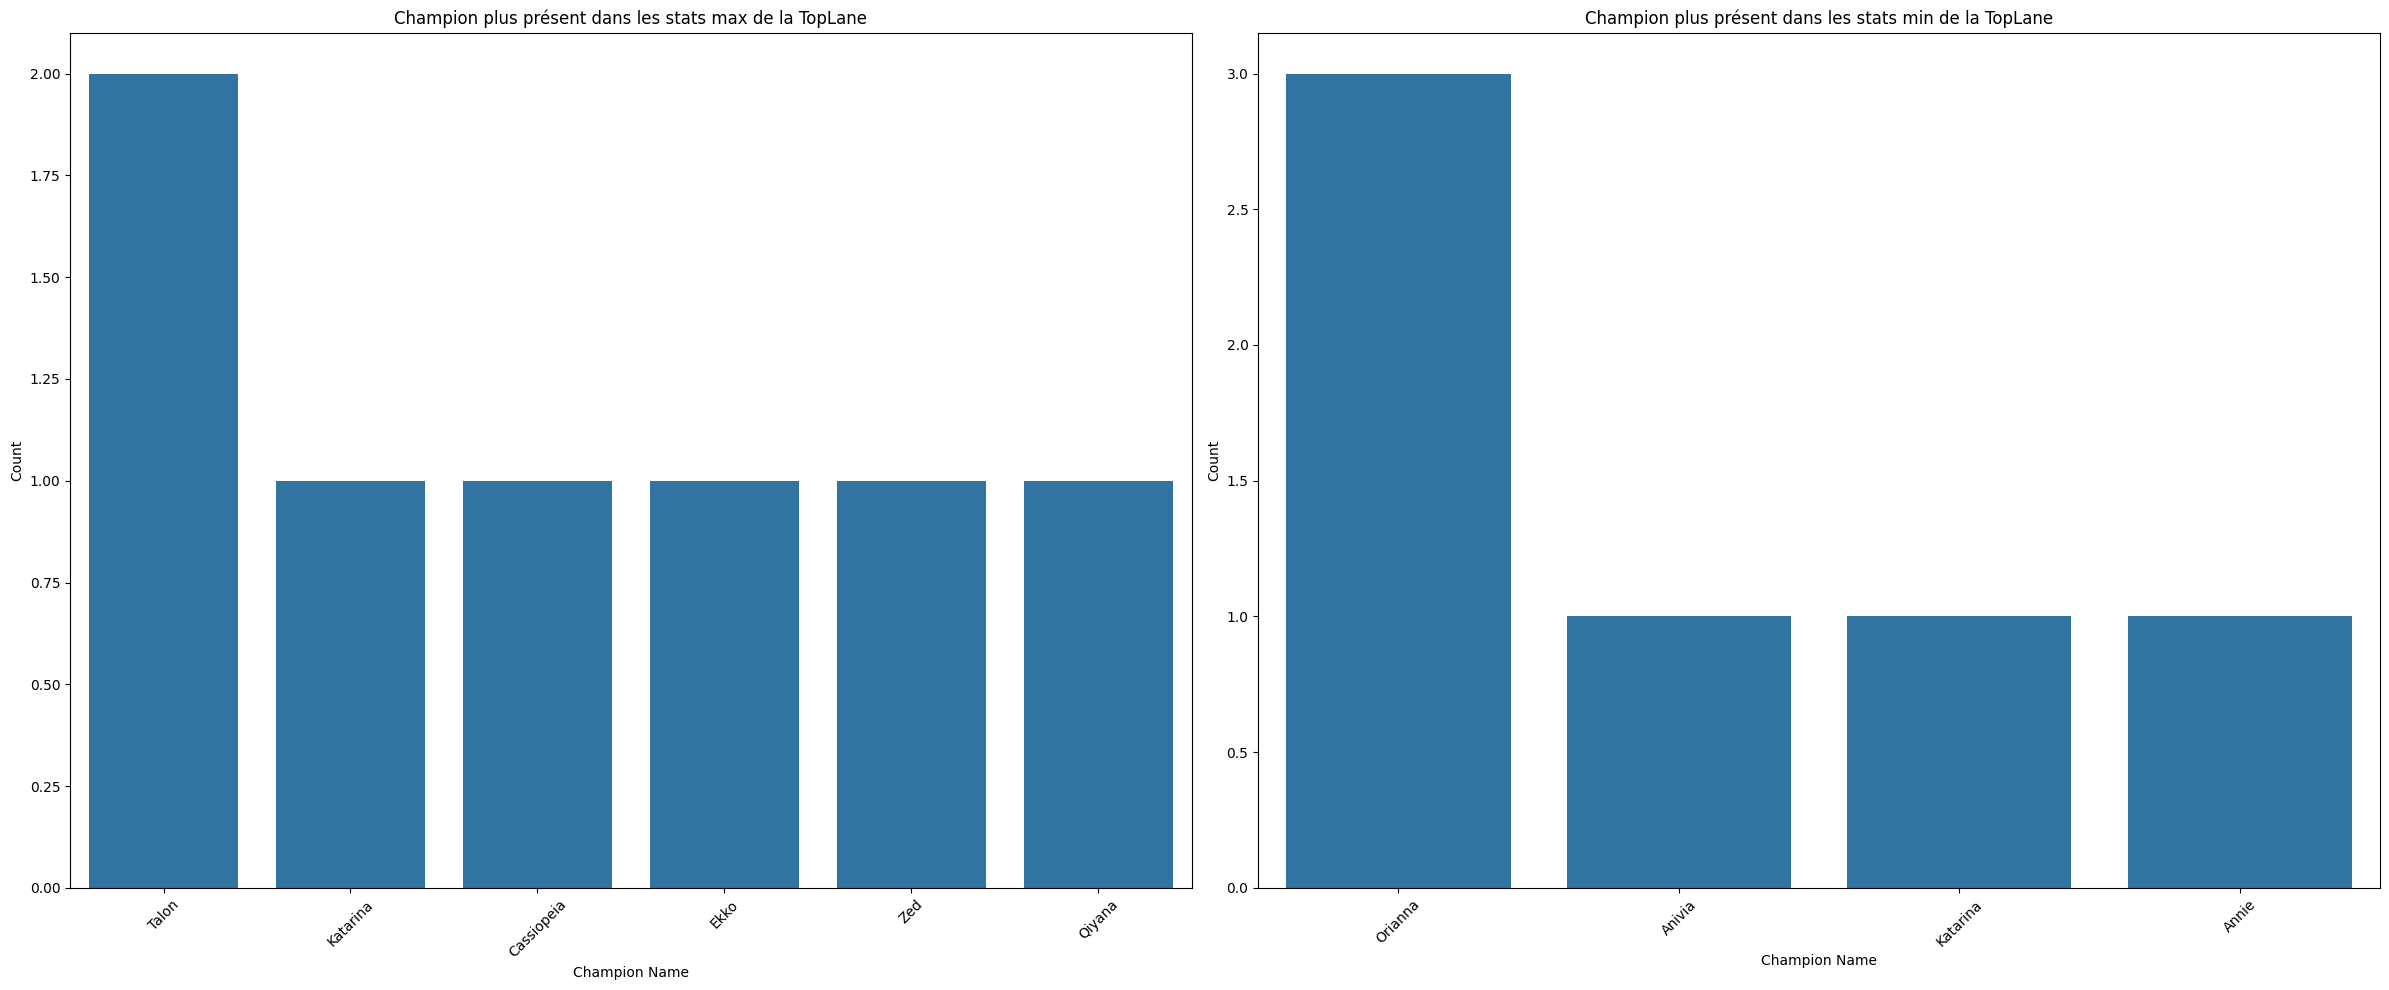

In [ ]:

# Calculer la fréquence d'apparition des champions dans les stats max
champion_counts_max = df_best_mid_max["Champion Name"].value_counts().reset_index()
champion_counts_max.columns = ["Champion Name", "Count"]

# Calculer la fréquence d'apparition des champions dans les stats min
champion_counts_min = df_best_mid_min["Champion Name"].value_counts().reset_index()
champion_counts_min.columns = ["Champion Name", "Count"]

# Créer les graphiques à barres côte à côte
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Graphique des stats max
sns.barplot(x="Champion Name", y="Count", data=champion_counts_max, ax=axes[0])
axes[0].set_title("Champion plus présent dans les stats max de la TopLane")
axes[0].set_xlabel("Champion Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Graphique des stats min
sns.barplot(x="Champion Name", y="Count", data=champion_counts_min, ax=axes[1])
axes[1].set_title("Champion plus présent dans les stats min de la TopLane")
axes[1].set_xlabel("Champion Name")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ADC

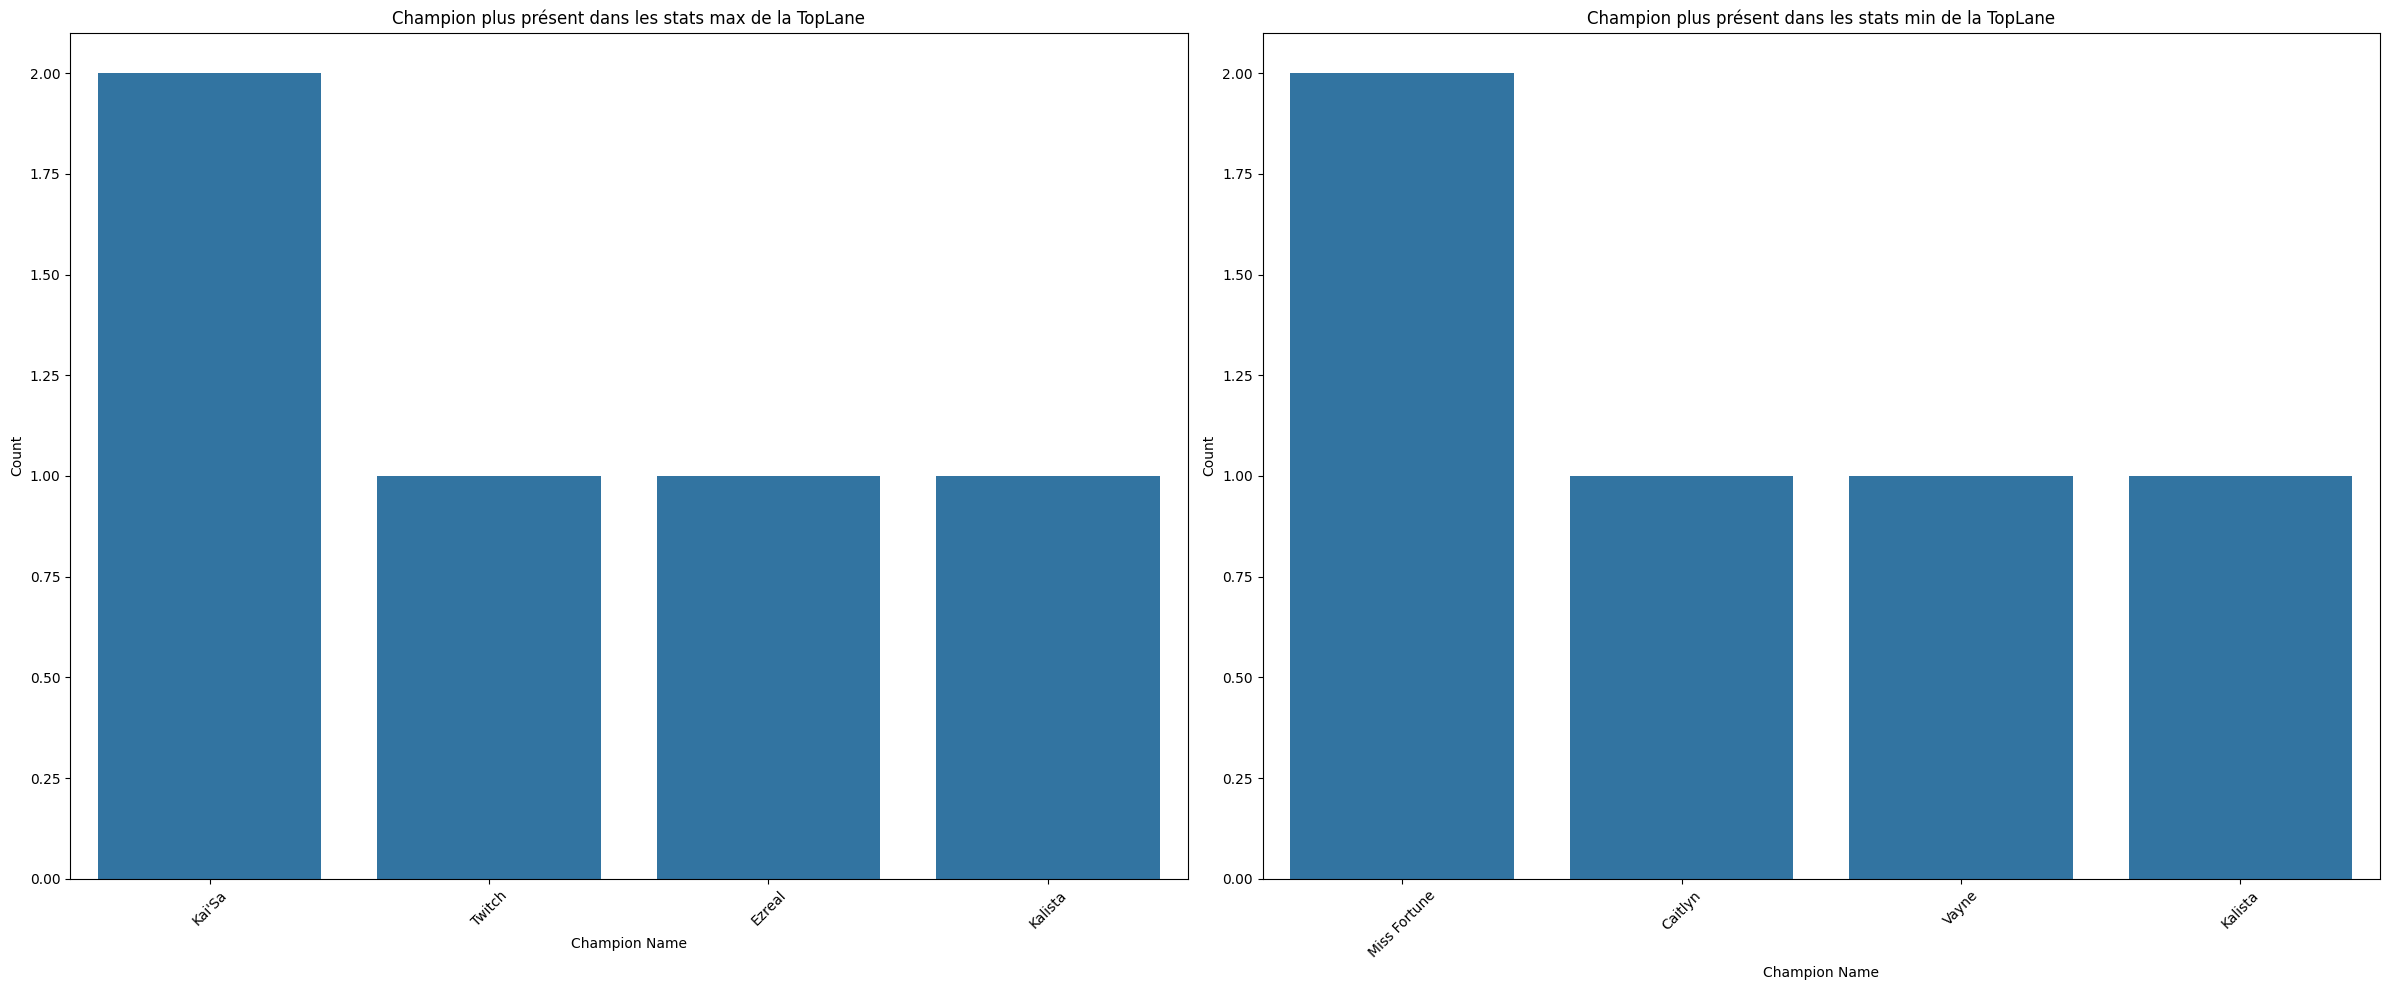

In [ ]:

# Calculer la fréquence d'apparition des champions dans les stats max
champion_counts_max = df_best_adc_max["Champion Name"].value_counts().reset_index()
champion_counts_max.columns = ["Champion Name", "Count"]

# Calculer la fréquence d'apparition des champions dans les stats min
champion_counts_min = df_best_adc_min["Champion Name"].value_counts().reset_index()
champion_counts_min.columns = ["Champion Name", "Count"]

# Créer les graphiques à barres côte à côte
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Graphique des stats max
sns.barplot(x="Champion Name", y="Count", data=champion_counts_max, ax=axes[0])
axes[0].set_title("Champion plus présent dans les stats max de la TopLane")
axes[0].set_xlabel("Champion Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Graphique des stats min
sns.barplot(x="Champion Name", y="Count", data=champion_counts_min, ax=axes[1])
axes[1].set_title("Champion plus présent dans les stats min de la TopLane")
axes[1].set_xlabel("Champion Name")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# SUPPORT

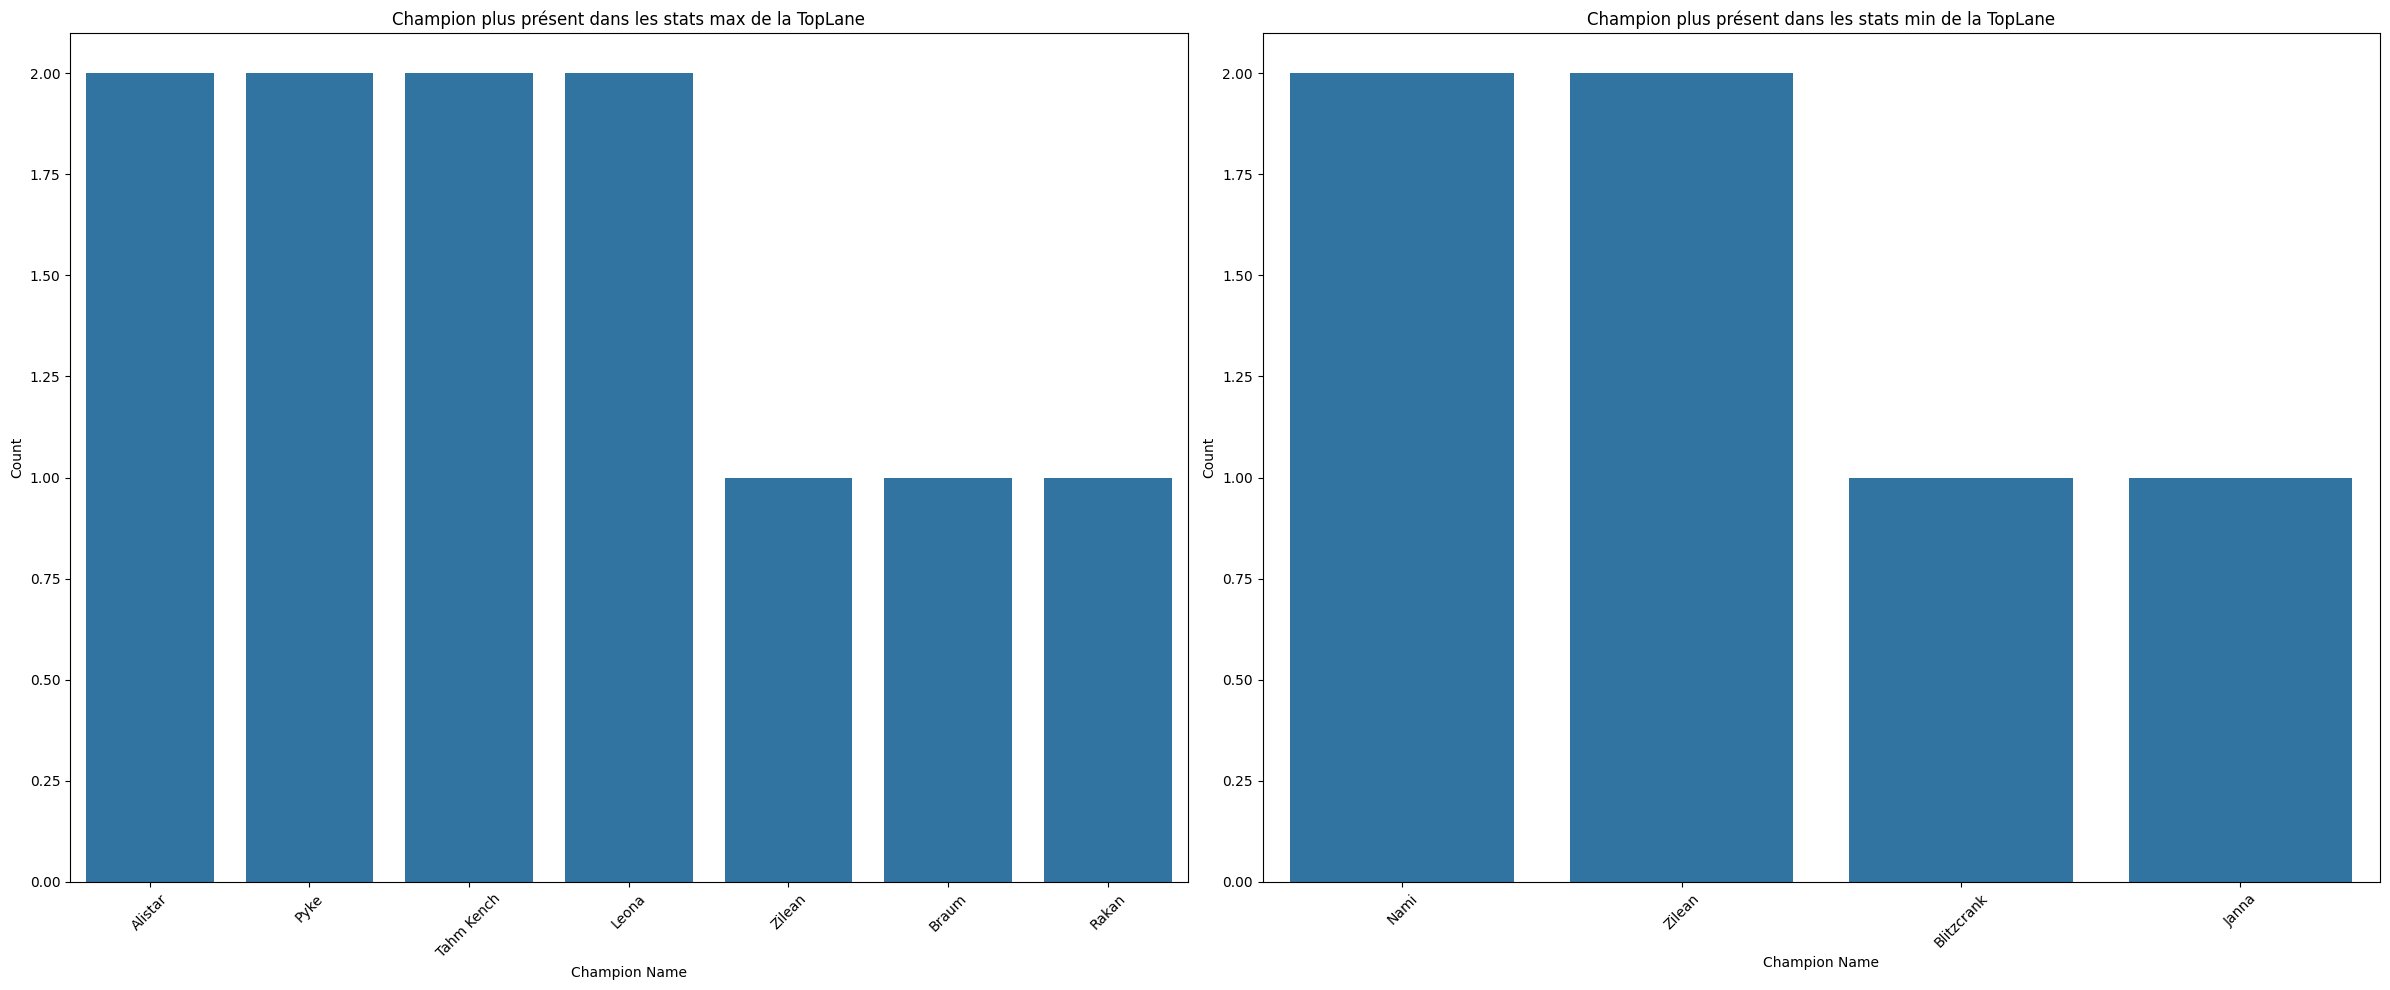

In [ ]:

# Calculer la fréquence d'apparition des champions dans les stats max
champion_counts_max = df_best_support_max["Champion Name"].value_counts().reset_index()
champion_counts_max.columns = ["Champion Name", "Count"]

# Calculer la fréquence d'apparition des champions dans les stats min
champion_counts_min = df_best_support_min["Champion Name"].value_counts().reset_index()
champion_counts_min.columns = ["Champion Name", "Count"]

# Créer les graphiques à barres côte à côte
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Graphique des stats max
sns.barplot(x="Champion Name", y="Count", data=champion_counts_max, ax=axes[0])
axes[0].set_title("Champion plus présent dans les stats max de la TopLane")
axes[0].set_xlabel("Champion Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Graphique des stats min
sns.barplot(x="Champion Name", y="Count", data=champion_counts_min, ax=axes[1])
axes[1].set_title("Champion plus présent dans les stats min de la TopLane")
axes[1].set_xlabel("Champion Name")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

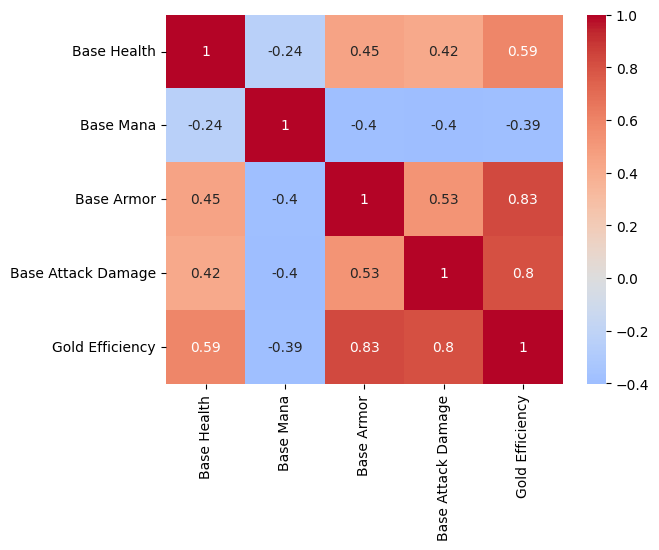

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
df_nb = df_lol.select_dtypes(include="number")
sns.heatmap(df_nb.corr(), annot=True, cmap="coolwarm", center = 0)
plt.show()